<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module2/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
#from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #To ignore the warning

In [ ]:
#to make notebook run stable across runs
np.random.seed(45)
#multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Load data
def load_data(Filepath):
  data = pd.read_csv(
    Filepath,      # relative python path to subdirectory
    sep=',',           # Comma-separated value file.
    encoding='utf8',        # encoding
    header=0,                  # specify a row as header
    #usecols=[1,2,3,4,5,6,7,8,9,10,11],   # Only load the  columns specified.
    #dtype={"age": int,"NumberOfTime30-59DaysPastDueNotWorse":int,"NumberOfOpenCreditLinesAndLoans":int,"NumberOfTimes90DaysLate":int},             # Parse the agecolumn as an integer     
    parse_dates=True,     # Intepret the date column as a date
    skiprows=None,         # Skip the first few rows of the file
    na_values=['.', 'na','NA','NAN','NaN']       # Take any '.' or 'na' values as NA
    )
  return data

Filepath='/content/drive/MyDrive/Projects/Fraud/Fraud.csv'
df=load_data(Filepath)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#data exploration
def explore_data(df):
    print(f"First 5 rows : \n {df.head()} \n")
    print(f"Shape : \n {df.shape} \n")
    print(f"Columns : \n {df.columns} \n")
    print(f"Data types : \n {df.dtypes}\n")
    print(f"Summary of data : \n {df.describe()} \n")
    print(f"data info :\n{df.info()}\n")
    print(f"Null objects in each column :\n{df.isnull().sum()}\n")
    print(f"Duplicate rows in data :\n{np.any(df.duplicated())}\n")

  
explore_data(df)

First 5 rows : 
    step      type    amount  ... newbalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...            0.0        0               0
1     1   PAYMENT   1864.28  ...            0.0        0               0
2     1  TRANSFER    181.00  ...            0.0        1               0
3     1  CASH_OUT    181.00  ...            0.0        1               0
4     1   PAYMENT  11668.14  ...            0.0        0               0

[5 rows x 11 columns] 

Shape : 
 (6362620, 11) 

Columns : 
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object') 

Data types : 
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFr

In [ ]:
#Handling  missing value by column
def miss_column(df):
  print(f"Missing objects in dataframe before :\n{np.any(df.isna())}\n")
  #df.dropna(thresh=len(df)*0.9, axis=1)  #drop columns in which more than 10% of values missing
  miss_col=list(df.columns[df.isnull().any()])
  print(f"Missing columns in dataframe are :\n{miss_col}\n")  
  for col in miss_col:
    #df[col].fillna(df[col].median(),inplace=True)
    df.dropna(subset=[col],inplace=True) # or use fill 
  print(f"Missing objects in dataframe after :\n{np.any(df.isna())}\n")
  return df

#No missing values 
#df=miss_column(df)

In [ ]:
def duplicate_drop(df):
  print(f"Duplicate objects in dataframe before :\n{df.duplicated().value_counts()}\n")
  #df.dropna(thresh=len(df)*0.9, axis=1)  #drop columns in which more than 10% of values missing
  df=df.drop_duplicates()
  print(f"Duplicate objects in dataframe after :\n{df.duplicated().value_counts()}\n")
  return df
#No duplicates
#df=duplicate_drop(df) 

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
Uniques,743,5,5316900,6353307,1845844,2682586,2722362,3614697,3555499,2,2


(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

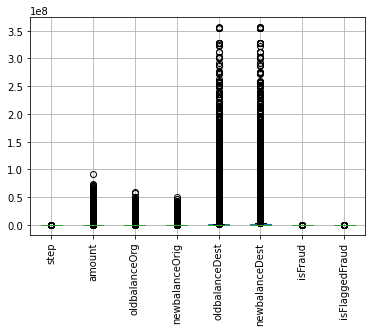

In [ ]:
# Checking for outliers
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(f"Data shape: {df.shape}")

Data shape: (6362620, 11)


Text(0.5, 1.0, 'Count of Fraudulent Payments')

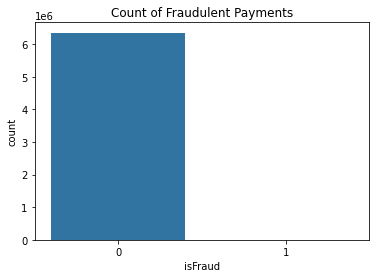

Number of normal examples:  6354407
Number of fradulent examples:  8213


In [ ]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.isFraud == 1] 
df_non_fraud = df.loc[df.isFraud == 0]

sns.countplot(x="isFraud",data=df)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.isFraud.count())
print("Number of fradulent examples: ",df_fraud.isFraud.count())
#print(df1.isFraud.value_counts()) # does the same thing above

In [ ]:
import math
a= (8213/(6354407+8213))*100
print ('The percentage of Fraud transactions is ' "%.2f" % a, '%' )

The percentage of Fraud transactions is 0.13 %


There is a imbalance in dataset

In [ ]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set3')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.4f}%'.format(100*height/total),
                ha="center") 
    plt.show()

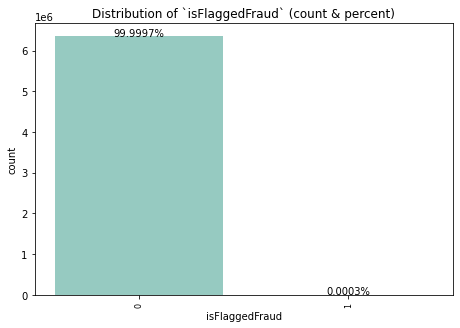

In [ ]:
plot_count(df, 'isFlaggedFraud', 'Distribution of `isFlaggedFraud` (count & percent)', size=2.5)

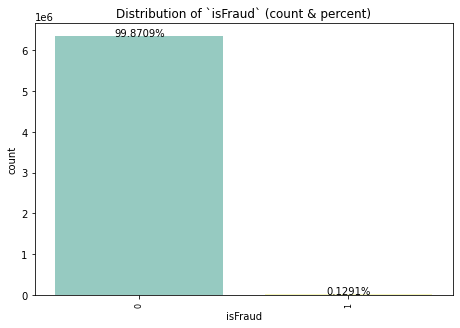

In [ ]:
plot_count(df, 'isFraud', 'Distribution of `isFraud` (count & percent)', size=2.5)

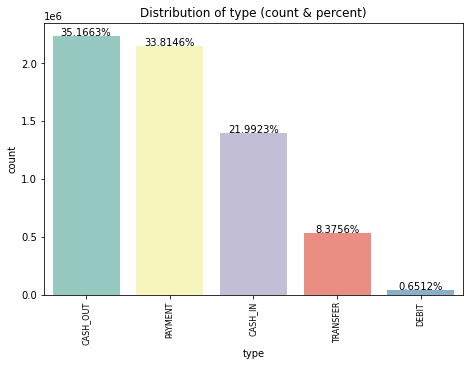

In [ ]:
plot_count(df, 'type', 'Distribution of type (count & percent)', size=2.5)

Text(0.5, 1.0, ' Comparison between Fraud and Flagged Fraud transactions')

Text(0.5, 0, '(isFlaggedFraud, isFraud)')

Text(0, 0.5, 'Count of transaction')

Text(-0.25, 6354407, '6,354,407')

Text(0.75, 8197, '8,197')

Text(1.75, 16, '16')

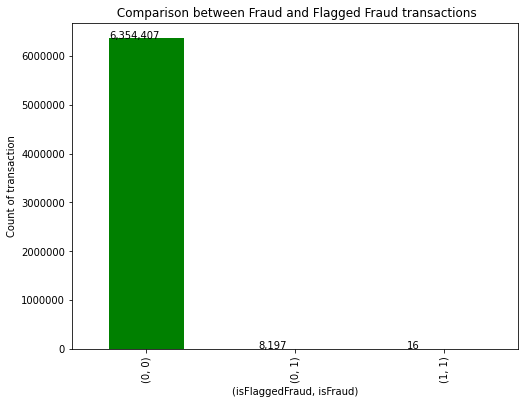

In [ ]:
ax = df.groupby(['isFlaggedFraud','isFraud']).size().plot(kind='bar',figsize=(8, 6), color='green')
ax.set_title(" Comparison between Fraud and Flagged Fraud transactions")
ax.set_xlabel("(isFlaggedFraud, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

Text(0.5, 1.0, ' Transaction which are the actual fraud per transaction type')

Text(0.5, 0, '(Type, isFraud)')

Text(0, 0.5, 'Count of transaction')

Text(-0.25, 1399284, '1,399,284')

Text(0.75, 2233384, '2,233,384')

Text(1.75, 4116, '4,116')

Text(2.75, 41432, '41,432')

Text(3.75, 2151495, '2,151,495')

Text(4.75, 528812, '528,812')

Text(5.75, 4097, '4,097')

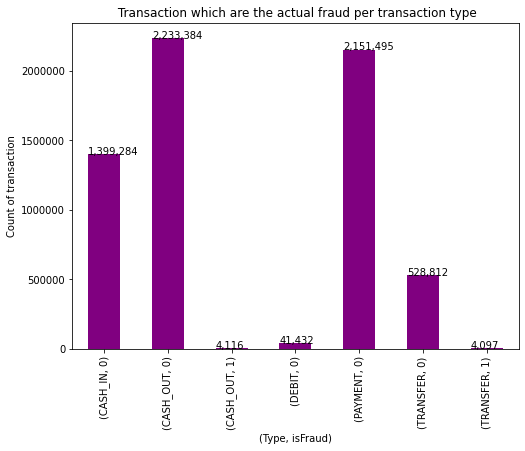

In [ ]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

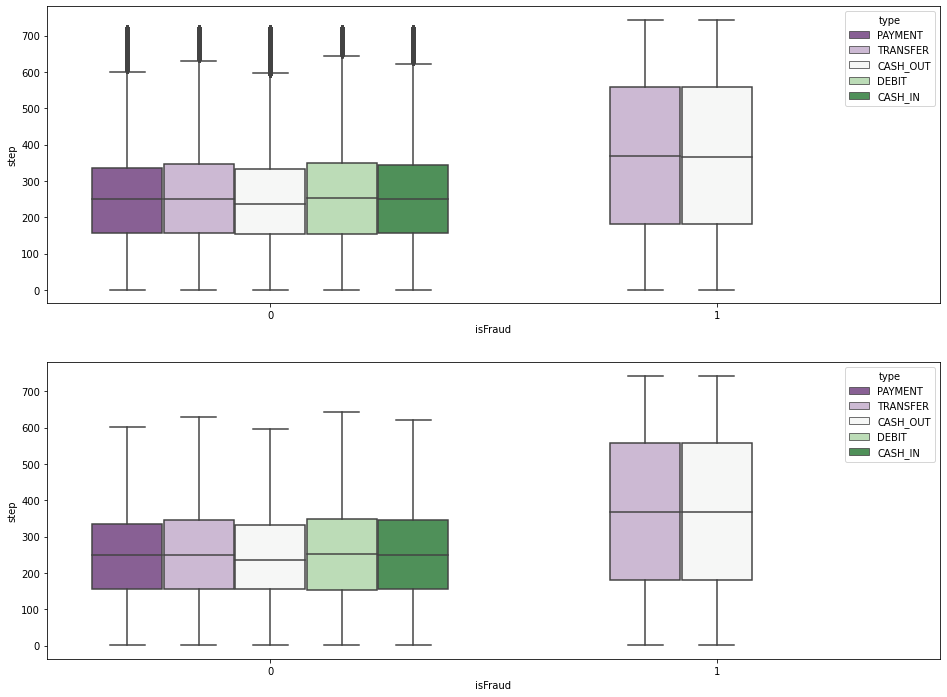

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="type",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="type",data=df, palette="PRGn",showfliers=False)
plt.show()


From the above graph we can see that the Fraudulent transfers are from CASH_OUT(4116) and TRANSFER(4097) , transaction types

Text(0.5, 1.0, 'Transaction which are flagged as fraud per transaction type')

Text(0.5, 0, '(Type, isFlaggedFraud)')

Text(0, 0.5, 'Count of transaction')

Text(-0.25, 1413276.84, '1,399,284')

Text(0.75, 2259875.0, '2,237,500')

Text(1.75, 41846.32, '41,432')

Text(2.75, 2173009.95, '2,151,495')

Text(3.75, 538221.93, '532,893')

Text(4.75, 16.16, '16')

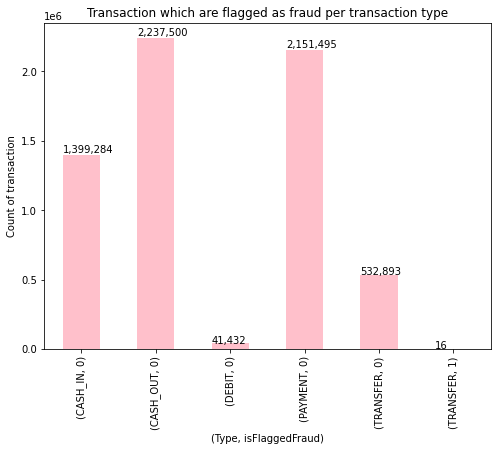

In [ ]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar',figsize=(8, 6), color='pink')
ax.set_title("Transaction which are flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

From the above graph we can see that the transfers that are Flagged Fraud are from TRANSFER(16) transaction type. So out of 4097 Fraud Transfers only 16 were flagged by the system. We can treat this feature insignificant 

In [ ]:
print('All Transactions ',df['nameOrig'].size)
print('Unique Transactions ',df['nameOrig'].unique().size)
print('Transactions from existing accounts ',df['nameOrig'].size-df['nameOrig'].unique().size)

All Transactions  6362620
Unique Transactions  6353307
Transactions from existing accounts  9313


In [ ]:
print('All Transactions ',df['nameDest'].size)
print('Unique Transactions ',df['nameDest'].unique().size)
print('Transactions from existing accounts ',df['nameDest'].size-df['nameOrig'].unique().size)

All Transactions  6362620
Unique Transactions  2722362
Transactions from existing accounts  9313


In [ ]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)


In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df1 = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


Taking note of the balances before and after transactions


In [ ]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


In [ ]:
# flatten the subsetted dataframe of floats into an array of floats
relevant_cols = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()
# number of observations with negative numbers
num_neg_amt = sum(n < 0 for n in relevant_cols)
# number of observations where the amount given is greater than the amount that is in the sender's account
num_amt_oldgiver = sum(df["amount"] > df["oldbalanceOrg"]) 
# number of observations where the amount received is greater than the amount that is in the receiver's account
num_amt_newreceiver = sum(df["amount"] > df["newbalanceDest"]) 

print("number of observations with negative numbers: ", num_neg_amt)
print("number of observations where the amount given is greater than the amount that is in the sender's account: "
      , num_amt_oldgiver)
print("number of observations where the amount received is greater than the amount that is in the receiver's account: "
      , num_amt_newreceiver)

number of observations with negative numbers:  0
number of observations where the amount given is greater than the amount that is in the sender's account:  4079080
number of observations where the amount received is greater than the amount that is in the receiver's account:  2661141


From the above results, we can conclude that :

There is erronous results in the new and old balance accounts for both sender and receiver
Some of this erronous results are due to fraudulent transactions
We cannot get rid of this features as well so we will let them be and add a new feature called 'errorbalance'

In [ ]:
df1["errorbalanceOrg"] = df1.newbalanceOrig + df1.amount - df1.oldbalanceOrg
df1["errorbalanceDest"] = df1.oldbalanceDest + df1.amount - df1.newbalanceDest

In [ ]:
# Subsetting data into observations with fraud and valid transactions:
fraud = df1[df1["isFraud"] == 1]
valid = df1[df1["isFraud"] == 0]

In [ ]:
print("Proportion of fraudulent transactions with errorBalanceDest > 0: ", len(fraud[fraud.errorbalanceDest > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(valid[valid.errorbalanceDest > 0])/len(valid))
print("Proportion of fraudulent transactions with errorBalanceOrg > 0: ", len(fraud[fraud.errorbalanceOrg > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(valid[valid.errorbalanceOrg > 0])/len(valid))

Proportion of fraudulent transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.19744942067832985
Proportion of fraudulent transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.9067180605576143


Conclusions:

Most of the transactions where errorbalanceDest > 0 has high chance of being fraud
Valid transactions are most likely to have errorbalanceOrig > 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd756b654d0>]],
      dtype=object)

Text(0.5, 0, '1 hour time step')

Text(0, 0.5, '# of transactions')

Text(0.5, 1.0, '# of valid transactions over time')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd756fcba50>]],
      dtype=object)

Text(0.5, 0, '1 hour time step')

Text(0, 0.5, '# of transactions')

Text(0.5, 1.0, '# of fraud transactions over time')

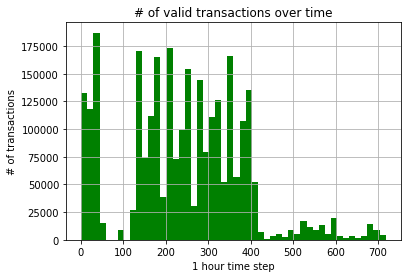

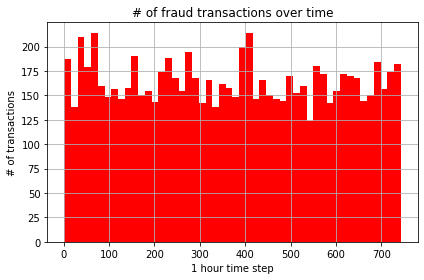

In [ ]:
# Time patterns
bins = 50
valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

The fraud transactions dont change much throughout the time frame

Text(0.5, 1.0, 'Fraud transactions by Day')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, '# of transactions')

Text(0.5, 1.0, 'Valid transactions by Day')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, '# of transactions')

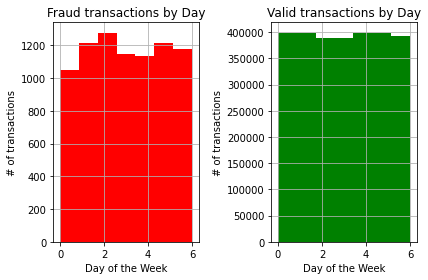

In [ ]:
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fraud transactions by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, '# of transactions')

Text(0.5, 1.0, 'Valid transactions by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, '# of transactions')

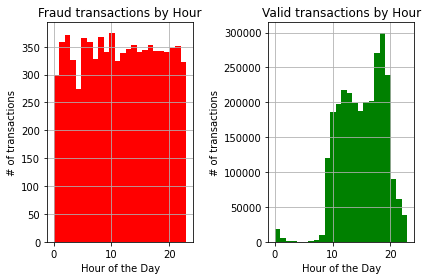

In [ ]:
#plotting  of the hours of days, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, there is strong evidence to suggest that from hour 0 to hour 9, valid transactions very rarely occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day

In [ ]:
dataset = df1.copy()

# adding feature HourOfDay to Dataset1 
dataset["HourOfDay"] = np.nan # initializing feature column
dataset.HourOfDay = df1.step % 24
print("Head of dataset1: \n", pd.DataFrame.head(dataset))

Head of dataset1: 
     step      type     amount  ...  errorbalanceOrg  errorbalanceDest  HourOfDay
2      1  TRANSFER     181.00  ...             0.00             181.0          1
3      1  CASH_OUT     181.00  ...             0.00           21363.0          1
15     1  CASH_OUT  229133.94  ...        213808.94          182703.5          1
19     1  TRANSFER  215310.30  ...        214605.30          237735.3          1
24     1  TRANSFER  311685.89  ...        300850.89        -2401220.0          1

[5 rows x 11 columns]


Highly correlated columns ['oldbalanceOrg', 'oldbalanceDest']


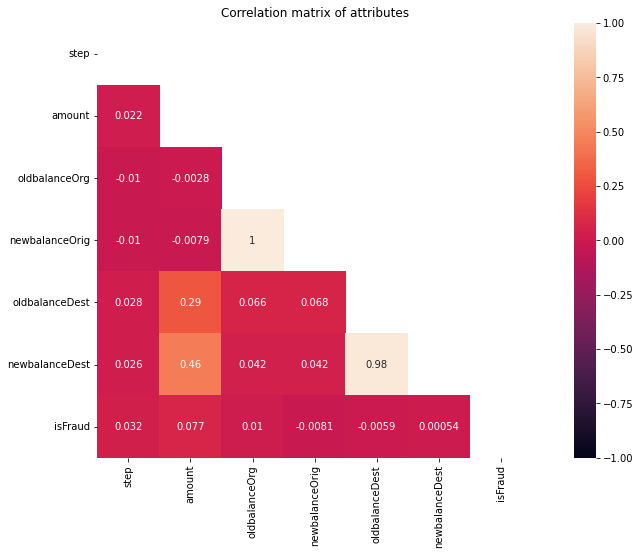

In [ ]:
def Correlation(df, bar=0.9):
  # Creates correlation matrix
  Corr = df.corr()
  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(Corr, dtype=bool))
  tri_df = Corr.mask(mask)
  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("Highly correlated columns",highly_cor_col)
  #Heat map for correlation matrix of attributes
  fig,ax=plt.subplots(figsize=(15,8))
  sns.heatmap(Corr,mask=mask,vmax=1.00,vmin=-1.00,square=True,annot=True,ax=ax)
  ax.set_title('Correlation matrix of attributes')
  plt.show()

  # Drop the highly correlated columns
  #reduced_df = df.drop(highly_cor_col, axis = 1)
  #print("shape of total data",df.shape,"shape of reduced data",reduced_df.shape)
  return df
  
df1=Correlation(df)

In [ ]:
print('\n NON-FRAUD CASE AMOUNT STATS ')
print(valid['amount'].describe())
print('\n FRAUD CASE AMOUNT STATS')
print(fraud['amount'].describe())


 NON-FRAUD CASE AMOUNT STATS 
count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64

 FRAUD CASE AMOUNT STATS
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


Handling Categorical Variables

In [ ]:
dataset = pd.get_dummies(dataset,prefix=['type'])
dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDay,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1,0,1


In [ ]:
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed(21)

X = dataset.drop("isFraud",1)
Y = dataset.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler()

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2216327, 11)
Shape of X_test:  (554082, 11)


The data is extremely skewed, so we will test the models on unbalanced datd first and then perform Resampling technique(OVERSAMPLING or UNDERSAMPLING)to make it a balanced dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)
# Predict on testing set
predictionsRF = RF.predict(X_test)
   
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest
for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[552436      0]
 [    10   1636]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Area Under Curve : 
 0.996962332928311


In [ ]:
# Train model2
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_train, y_train)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}

# showing results from Random Forest

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[552426     10]
 [    11   1635]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.99      0.99      0.99      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Area Under Curve : 
 0.9966495153989655


In [ ]:
# Train model3
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(X_train, y_train)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

Confusion Matrix : 
 [[552436      0]
 [  1646      0]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.00      0.00      0.00      1646

    accuracy                           1.00    554082
   macro avg       0.50      0.50      0.50    554082
weighted avg       0.99      1.00      1.00    554082
 

Area Under Curve : 
 0.5 



In [ ]:
print("Classification Report of Random Forest: \n", CR_RF)
print("Classification Report of Decision trees: \n", CR_DT)
print("Classification Report of XGB trees: \n", CR_XGB)

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Classification Report of Decision trees: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.99      0.99      0.99      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Classification Report of XGB trees: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.00      0.00      0.00      1646

    accuracy                           1.00    554082
   ma


Handling Imbalanced Data

One way to do oversampling is to replicate the under-presented class tuples until we attain a correct proportion between the class.


In [ ]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = dataset[0:] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['isFraud'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['isFraud'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(8213)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 8213 frauds so we need to take a similar number of non-fraud


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (16426, 11)
Resampled shape of Y:  (16426,)
Counter({0: 8213, 1: 8213})


Balanced Data

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(train_X, train_Y)
 
# Predict on testing set
predictionsRF = RF.predict(test_X)
 
     
# Evaluating model
CM_RF = confusion_matrix(test_Y,predictionsRF)
CR_RF = classification_report(test_Y,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(test_Y, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[2477    2]
 [   9 2440]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928

Area Under Curve : 
 0.9977591268492824


In [ ]:
# Train model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(train_X, train_Y)
 
# Predict on testing set
predictionsDT = DT.predict(test_X)
 
     
# Evaluating model
CM_DT = confusion_matrix(test_Y,predictionsDT)
CR_DT = classification_report(test_Y,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(test_Y, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}

# showing results from Random Forest

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[2474    5]
 [   7 2442]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928

Area Under Curve : 
 0.9975623740852314


In [ ]:
# Train model
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(train_X, train_Y)
 
# Predict on testing set
predictionsXGB = XGB.predict(test_X)
 
     
# Evaluating model
CM_XGB = confusion_matrix(test_Y,predictionsXGB)
CR_XGB = classification_report(test_Y,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(test_Y, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

Confusion Matrix : 
 [[2477    2]
 [   9 2440]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928
 

Area Under Curve : 
 0.9977591268492824 



In [ ]:
print("Classification Report of Random Forest: \n", CR_RF)
print("Classification Report of Decision trees: \n", CR_DT)
print("Classification Report of XGB trees: \n", CR_XGB)

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928

Classification Report of Decision trees: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928

Classification Report of XGB trees: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   ma

In [ ]:
print("Number of valid transactions labelled as fraudulent by Random Forest: \n", CM_RF[0,1])
print("Number of valid transactions labelled as fraudulent by XGB trees: \n", CM_XGB[0,1])
print("Number of valid transactions labelled as fraudulent by Decision Tree: \n", CM_DT[0,1])

Number of valid transactions labelled as fraudulent by Random Forest: 
 2
Number of valid transactions labelled as fraudulent by XGB trees: 
 2
Number of valid transactions labelled as fraudulent by Decision Tree: 
 5


In [ ]:
print("Number of fraud transactions labelled as valid by Random Forest: \n", CM_RF[1,0])
print("Number of fraud transactions labelled as valid by XGB trees: \n", CM_XGB[1,0])
print("Number of fraud transactions labelled as valid by Decision Tree: \n", CM_DT[1,0])

Number of fraud transactions labelled as valid by Random Forest: 
 9
Number of fraud transactions labelled as valid by XGB trees: 
 9
Number of fraud transactions labelled as valid by Decision Tree: 
 7


In [ ]:
print("\nAUC of Random Forest: \n", AUC_RF)
print("\nAUC of Decision Tree: \n", AUC_DT)
print("\nAUC of XGB trees: \n", AUC_XGB)


AUC of Random Forest: 
 0.9977591268492824

AUC of Decision Tree: 
 0.9975623740852314

AUC of XGB trees: 
 0.9977591268492824


Area Under Curve is a plot of the true positive rates (in our case, the proportion of valid transactions labelled as valid) against the false positive rate (in our case, the proportion of fraudulent transactions labelled as valid). The curve is also known as the Receiver Operating Characteristic Curve or ROC.

The ideal AUC is then 1 (all transactions predicted as valid are actually valid).

<Figure size 1296x504 with 0 Axes>

<BarContainer object of 11 artists>

([<matplotlib.axis.XTick at 0x7fd752ba0ad0>,
 [Text(0, 0, 'errorbalanceOrg'),
  Text(0, 0, 'oldbalanceOrg'),
  Text(0, 0, 'newbalanceOrig'),
  Text(0, 0, 'HourOfDay'),
  Text(0, 0, 'amount'),
  Text(0, 0, 'newbalanceDest'),
  Text(0, 0, 'oldbalanceDest'),
  Text(0, 0, 'step'),
  Text(0, 0, 'errorbalanceDest'),
  Text(0, 0, 'type_TRANSFER'),
  Text(0, 0, 'type_CASH_OUT')])

Text(0.5, 1.0, 'Important Features: Greatest to Least')

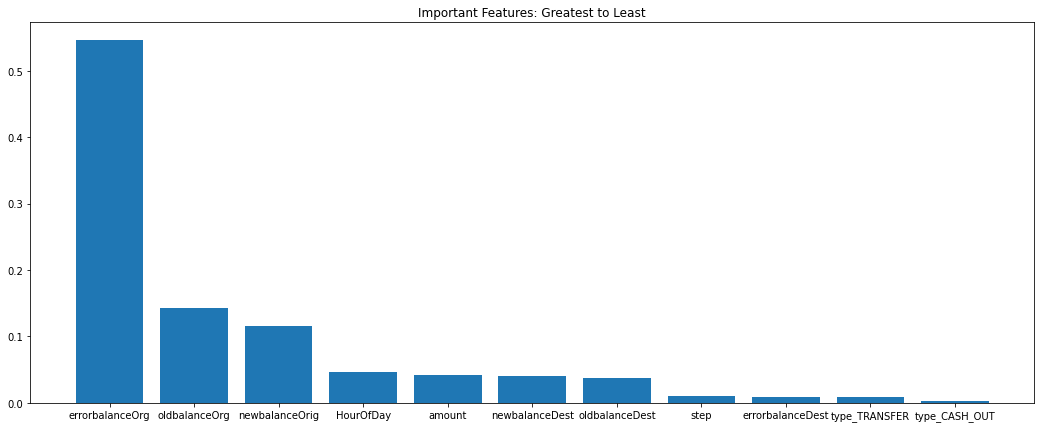

In [ ]:
#Important Features
ncols = len(X.columns)
x = np.arange(ncols)

# getting importances of features
importances = RF.feature_importances_

# getting the indices of the most important feature to least important
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()


errorBalanceOrg is the most important feature by far for classifying transactions followed by oldBalanceOrg and newBalanceOrig

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.1 MB 62 kB/s 


Model

From the data, we will use 80% for training and 20% for testing.

CatBoostClassifier (CatBoost) algorithm is used.“CatBoost” name comes from two words “Category” and “Boosting”.CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data.

“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.



ROC-AUC is the metric choosen.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [ ]:
#X = df1.drop(['isFraud', 'isFlaggedFraud'], axis=1)
#y = df1.isFraud

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X, Y, train_size=0.8, random_state=1234)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [ ]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=25)

In [ ]:
clf.fit(train_x, train_y,cat_features=categorical_features_indices,eval_set=(valid_x, valid_y),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9632072	best: 0.9632072 (0)	total: 8.29s	remaining: 1h 8m 56s
20:	test: 0.9989079	best: 0.9989079 (20)	total: 1m 43s	remaining: 39m 22s
40:	test: 0.9990064	best: 0.9990064 (40)	total: 3m 4s	remaining: 34m 22s
60:	test: 0.9990547	best: 0.9990596 (58)	total: 4m 11s	remaining: 30m 11s
80:	test: 0.9990301	best: 0.9990596 (58)	total: 5m 18s	remaining: 27m 30s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.9990595602
bestIteration = 58

Shrink model to first 59 iterations.


In [ ]:
preds = clf.predict(valid_x)

Text(0.5, 1.0, 'Confusion Matrix')

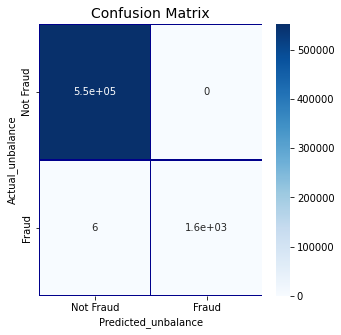

In [ ]:
cm = pd.crosstab(valid_y.values, preds, rownames=['Actual_unbalance'], colnames=['Predicted_unbalance'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(f"ROC-AUC score: {roc_auc_score(valid_y.values, preds)}")

ROC-AUC score: 0.9981718464351006


 CatBoostClassifier has the Area under Curve closest to 1 for unbalanced Data

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, Y_resampled, train_size=0.8, random_state=1234)

In [ ]:
clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_valid, y_valid),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9984522	best: 0.9984522 (0)	total: 447ms	remaining: 3m 43s
20:	test: 0.9992380	best: 0.9993050 (7)	total: 5.09s	remaining: 1m 56s
40:	test: 0.9992824	best: 0.9993106 (25)	total: 9.66s	remaining: 1m 48s
60:	test: 0.9994188	best: 0.9994188 (60)	total: 17.8s	remaining: 2m 8s
80:	test: 0.9994562	best: 0.9994847 (75)	total: 23.8s	remaining: 2m 3s
100:	test: 0.9995125	best: 0.9995125 (100)	total: 30.3s	remaining: 1m 59s
120:	test: 0.9994395	best: 0.9995125 (100)	total: 38.3s	remaining: 2m
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.9995124843
bestIteration = 100

Shrink model to first 101 iterations.


In [ ]:
preds = clf.predict(X_valid)

Text(0.5, 1.0, 'Confusion Matrix')

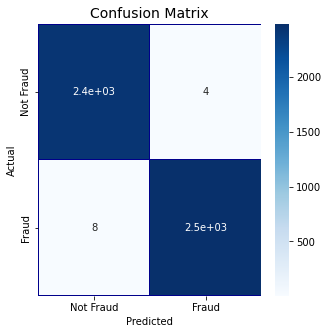

In [ ]:
cm = pd.crosstab(y_valid.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(f"ROC-AUC score: {roc_auc_score(y_valid.values, preds)}")

ROC-AUC score: 0.9975741521846386


In [ ]:
print("\nAUC of Random Forest: \n", AUC_RF)
print("\nAUC of XGB trees: \n", AUC_XGB)


AUC of Random Forest: 
 0.9977591268492824

AUC of XGB trees: 
 0.9977591268492824


Random Forest and XGB has the Area under Curve closest to 1